### 🧠 Sistem Inteligent pentru Diagnosticarea Timpurie a Cancerului Pulmonar
* ####  Analiza Datelor de Intrare

In [ ]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns 
from matplotlib import image as mpimg

#### 📈 Vizualizarea structurii Dataset-ului pentru fiecare clasa
* ##### Imagini pentru antrenare 70%
* ##### Imagini pentru validare 10%
* ##### Imagini pentru testare 20%

In [35]:
def plot_class_distribution_from_csv(csv_path):
    df = pd.read_csv(csv_path)
    df['split'] = df['split'].replace({
        'train': 'Train',
        'valid': 'Validation',
        'test':  'Test'
    })
    df['class'] = df['class'].str.replace('_', ' ')
    
    plt.style.use('dark_background')
    sns.set_palette('deep')
    
    plt.figure(figsize=(10, 6))
    sns.barplot(
        data=df,
        x='class',
        y='num_images',
        hue='split',
        order=df['class'].unique(),    
        hue_order=['Train', 'Validation', 'Test']
    )
    plt.title('Class Distribution in Train, Validation, and Test Sets', color='white', pad=15)
    plt.xlabel('')
    plt.ylabel('Number of Images', color='white')
    
    plt.xticks(rotation=15, color='white')
    plt.yticks(color='white')
    leg = plt.legend(title='Set')
    plt.setp(leg.get_texts(), color='white')
    plt.setp(leg.get_title(), color='white')
    
    plt.tight_layout()
    plt.show()


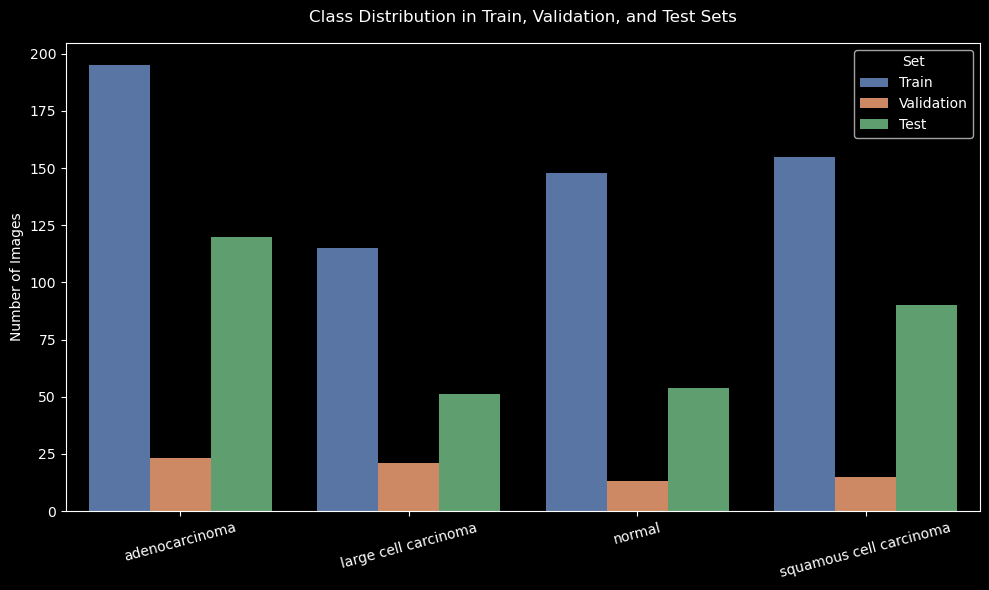

In [36]:
plot_class_distribution_from_csv("../data_preprocessing/results/image_distribution.csv")

#### ✂️ Vizualizarea imaginilor pentru fiecare clasa inainte si dupa procesare
####    Ce presupune procesarea?
* ##### Redimensionare la dimensiunea fixa 224x244 pixeli
* ##### Normalizarea pixelilor dintr-un interval de [0...255] la [0.0...1.0]
* ##### Clasificarea in structuri si clase

In [57]:
def view_two_images(path1, path2,suptitle=None):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    if suptitle:
        fig.suptitle(suptitle, fontsize=16)
    for ax, path in zip(axes, (path1, path2)):
        img = mpimg.imread(path)[...,:3] 
        ax.imshow(img)   
    plt.tight_layout()
    plt.show()

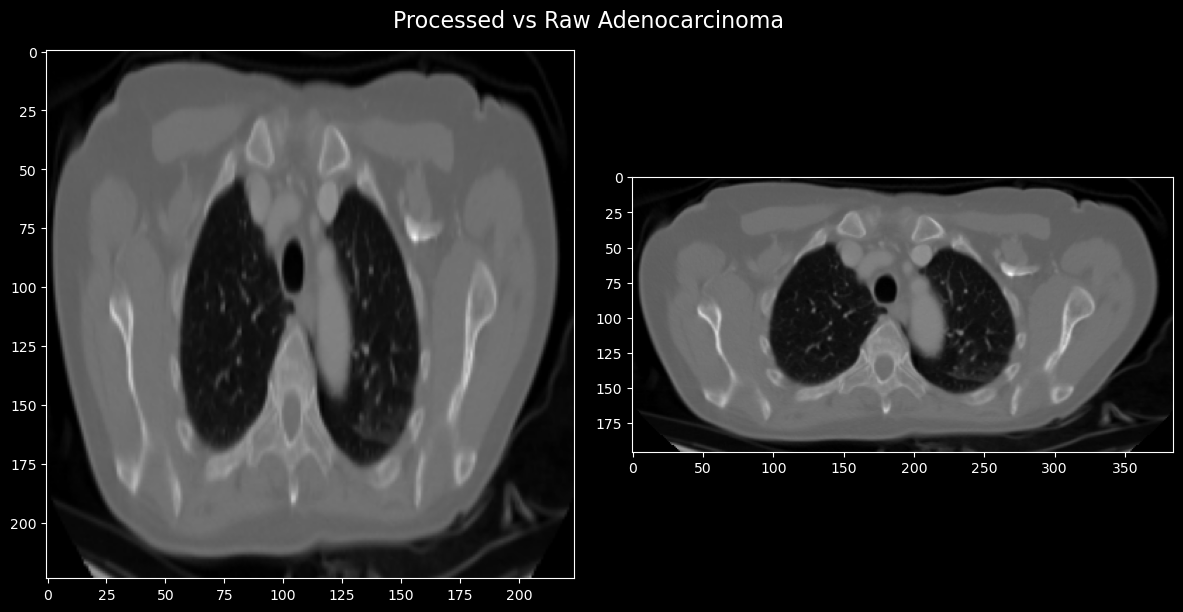

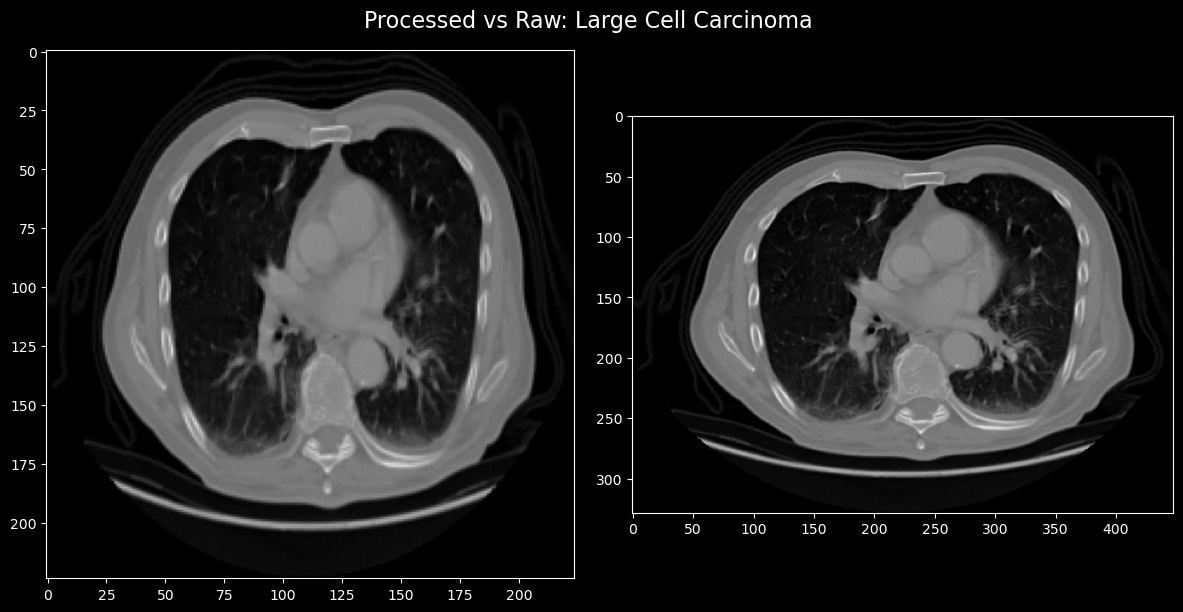

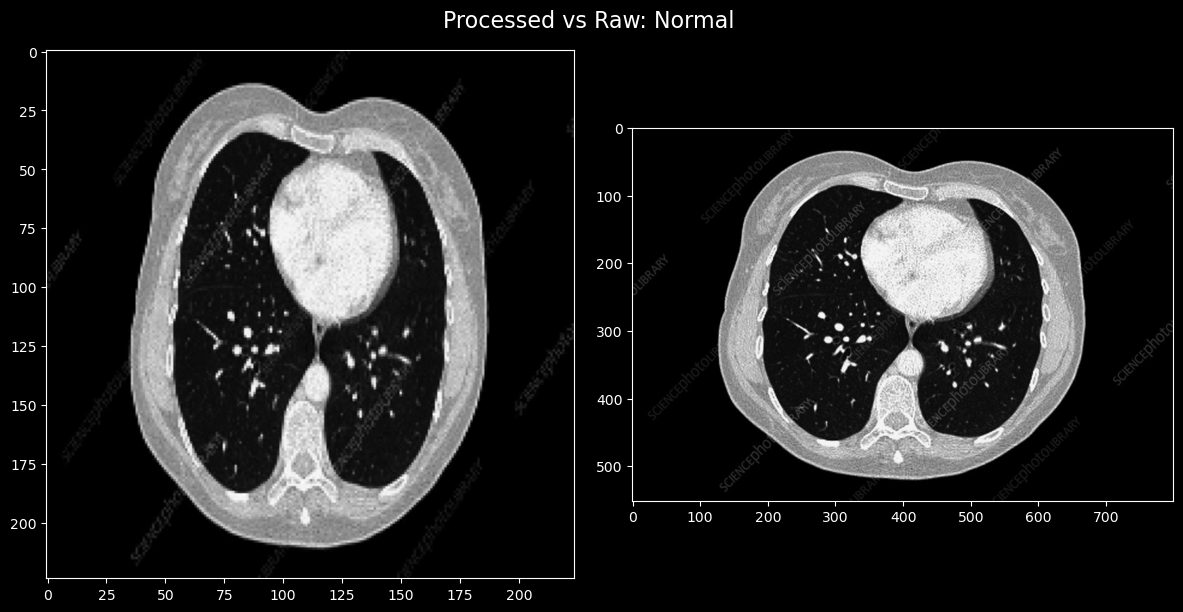

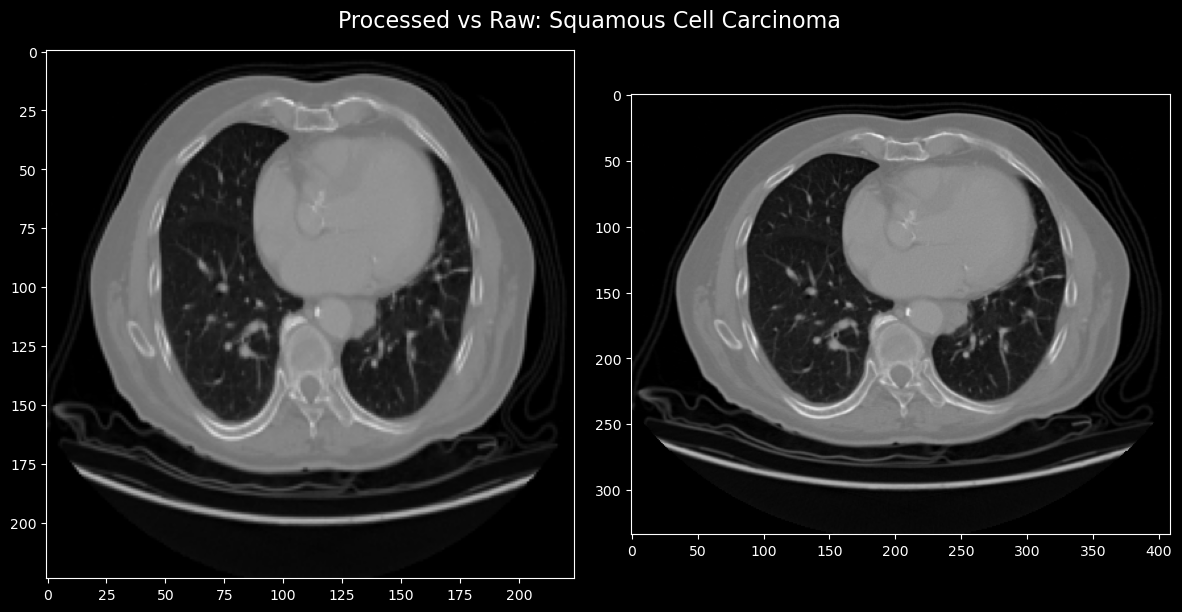

In [58]:
view_two_images("../dataset/preprocessed_dataset/train/adenocarcinoma/000022.png","../dataset/lung_cancer_dataset/train/adenocarcinoma/000022.png","Processed vs Raw Adenocarcinoma")

view_two_images("../dataset/preprocessed_dataset/test/large_cell_carcinoma/000116.png","../dataset/lung_cancer_dataset/test/large_cell_carcinoma/000116.png","Processed vs Raw: Large Cell Carcinoma")

view_two_images("../dataset/preprocessed_dataset/test/normal/6.png","../dataset/lung_cancer_dataset/test/normal/6.png","Processed vs Raw: Normal")

view_two_images("../dataset/preprocessed_dataset/test/squamous_cell_carcinoma/000111.png","../dataset/lung_cancer_dataset/test/squamous_cell_carcinoma/000111.png","Processed vs Raw: Squamous Cell Carcinoma")